In [58]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
df=pd.read_csv("sugarcane.csv")

In [60]:
df.shape

(103, 7)

In [61]:
df.head()



,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data cleaning

In [62]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/3794260676.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")


In [63]:
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/2149148769.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")


In [64]:
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/3644492451.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")


In [65]:
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/2830864064.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")


In [66]:
df=df.drop("Unnamed: 0",axis=1)

In [67]:
df.rename(columns={"Production (Tons)":"production(Tons)"},inplace=True)

In [68]:
df.rename(columns={"Production per Person (Kg)":"production_per_person(Kg)"},inplace=True)

In [69]:
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)

In [70]:
df.rename(columns={"Yield (Kg / Hectare)":"yeild(Kg/Hectare)"},inplace=True)

In [71]:
df.head()

,Country,Continent,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [72]:
df.isna().sum()

Country                      0
Continent                    0
production(Tons)             0
production_per_person(Kg)    0
Acreage(Hectare)             1
yeild(Kg/Hectare)            1
dtype: int64

In [73]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [74]:
df=df.dropna().reset_index().drop("index",axis=1)

In [75]:
df

,Country,Continent,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [76]:
df.nunique()

Country                      102
Continent                      6
production(Tons)             102
production_per_person(Kg)    101
Acreage(Hectare)             101
yeild(Kg/Hectare)            102
dtype: int64

In [77]:
df.dtypes

Country                      object
Continent                    object
production(Tons)             object
production_per_person(Kg)    object
Acreage(Hectare)             object
yeild(Kg/Hectare)            object
dtype: object

In [78]:
df["production(Tons)"]=df["production(Tons)"].astype(float)

In [79]:
df["production_per_person(Kg)"]=df["production_per_person(Kg)"].astype(float)

In [80]:
df["yeild(Kg/Hectare)"]=df["yeild(Kg/Hectare)"].astype(float)

In [81]:
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)

In [82]:
df.dtypes

Country                       object
Continent                     object
production(Tons)             float64
production_per_person(Kg)    float64
Acreage(Hectare)             float64
yeild(Kg/Hectare)            float64
dtype: object

## univariate analysis

In [83]:
df.head()

,Country,Continent,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## how many contries produces sugarcane from each continent?

In [85]:
df["Continent"].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

<Axes: >

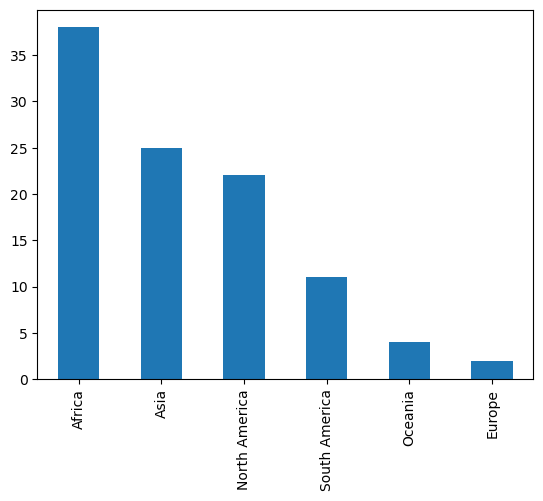

In [86]:
df["Continent"].value_counts().plot(kind="bar")

In [87]:
df.describe()

,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## checking outliers

Text(0.5, 1.0, 'production(Tons)')

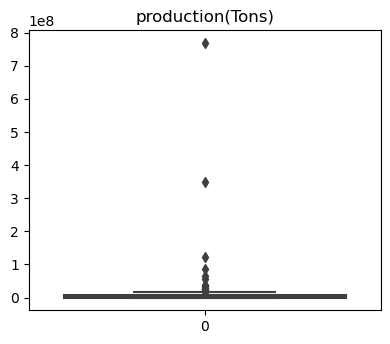

In [91]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df["production(Tons)"])
plt.title("production(Tons)")

Text(0.5, 1.0, 'production_per_person(Kg)')

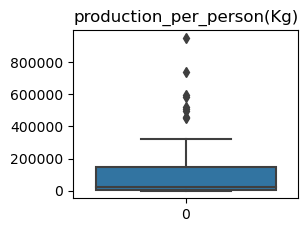

In [101]:
plt.subplot(2,2,2)
sns.boxplot(df["production_per_person(Kg)"])
plt.title("production_per_person(Kg)")

Text(0.5, 1.0, 'Acreage(Hectare)')

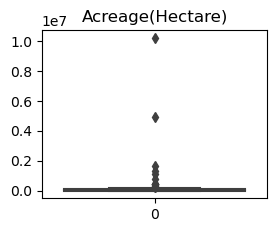

In [103]:
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

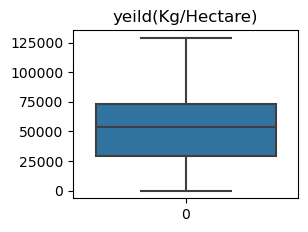

In [104]:
plt.subplot(2,2,4)
sns.boxplot(df["yeild(Kg/Hectare)"])
plt.title("yeild(Kg/Hectare)")
plt.show()

## distribution of columns

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/1173584749.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["production(Tons)"])
/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/1173584749.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["production_p

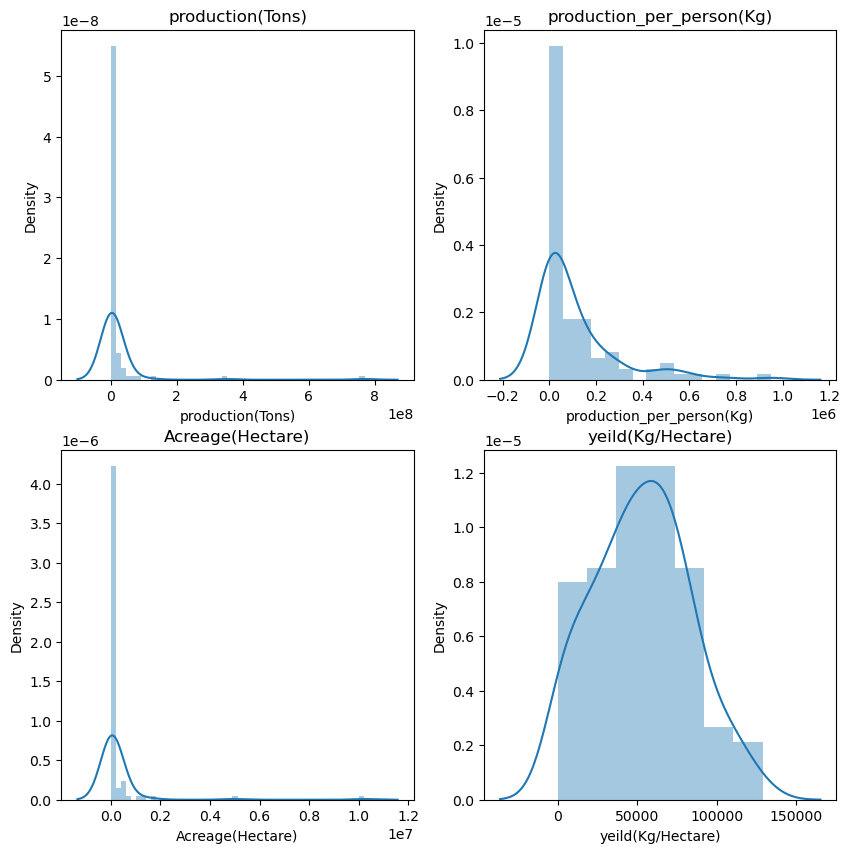

In [106]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["production(Tons)"])
plt.title("production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["production_per_person(Kg)"])
plt.title("production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["yeild(Kg/Hectare)"])
plt.title("yeild(Kg/Hectare)")
plt.show()


<Axes: >

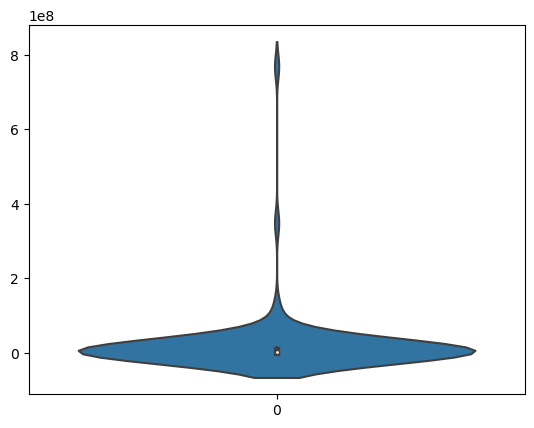

In [107]:
sns.violinplot(df["production(Tons)"])

## Bivariate Analysis

In [108]:
df.head()

,Country,Continent,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## which country produces maximum sugarcane?

In [109]:
df_new=df[["Country","production(Tons)"]].set_index("Country")

In [110]:
df_new["production(Tons_percentage)"]=df_new["production(Tons)"]*100/df_new["production(Tons)"].sum()

In [111]:
df_new

,production(Tons),production(Tons_percentage)
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='production(Tons_percentage)'>

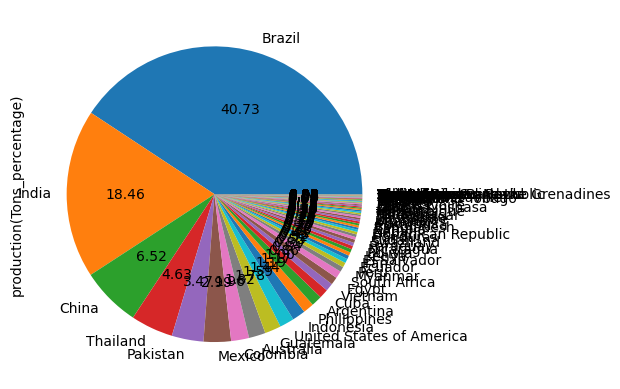

In [112]:
df_new["production(Tons_percentage)"].plot(kind="pie",autopct="%.2f")

In [114]:
df[["Country","production(Tons)"]].set_index("Country").sort_values("production(Tons)",ascending=False).head(10)

,production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


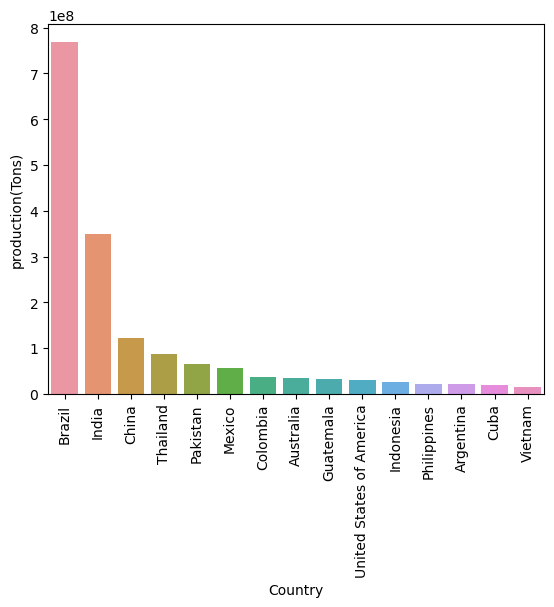

In [122]:
ax=sns.barplot(data=df.head(15),x="Country",y="production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


## which country haas the highest land?

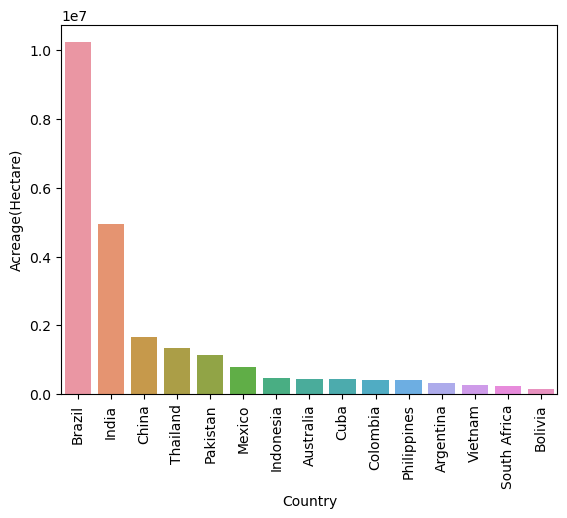

In [126]:
df_acr=df.sort_values("Acreage(Hectare)",ascending=False).head(15)
ax=sns.barplot(data=df_acr,x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## which country has the highest production

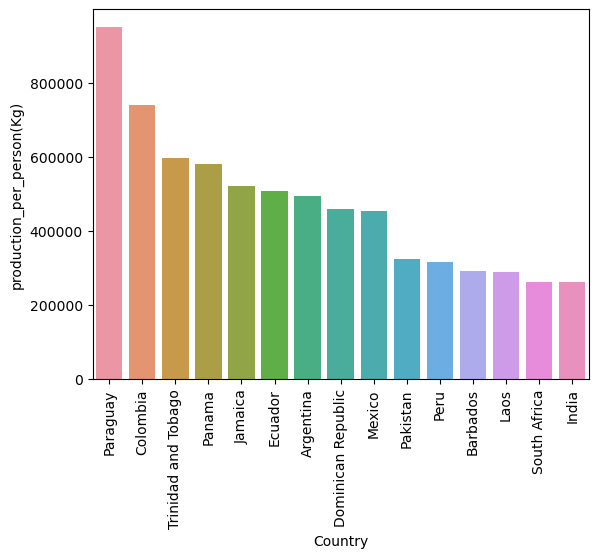

In [130]:
df_yield=df.sort_values("production_per_person(Kg)",ascending=False).head(15)
ax=sns.barplot(data=df_yield,x="Country",y="production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##corelation

In [131]:
df.corr()

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
production(Tons),1.000000,0.015000,0.997550,0.132812
production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
yeild(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/1199863406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Greens")


<Axes: >

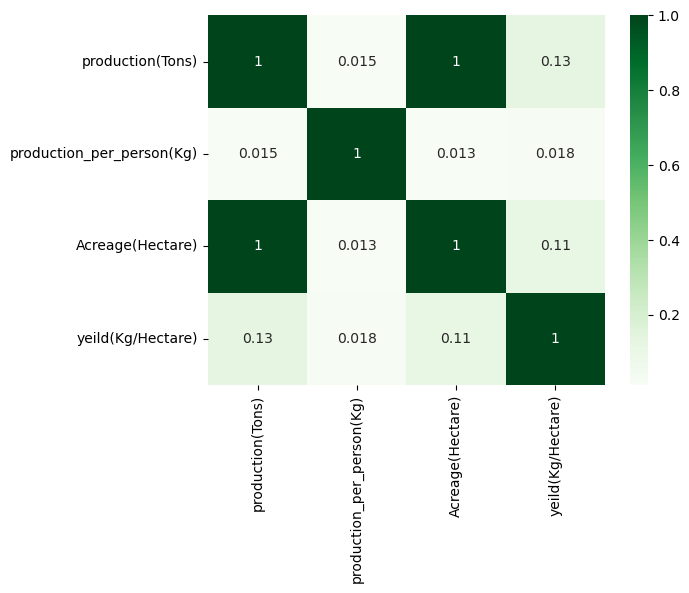

In [135]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

## do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='production(Tons)'>

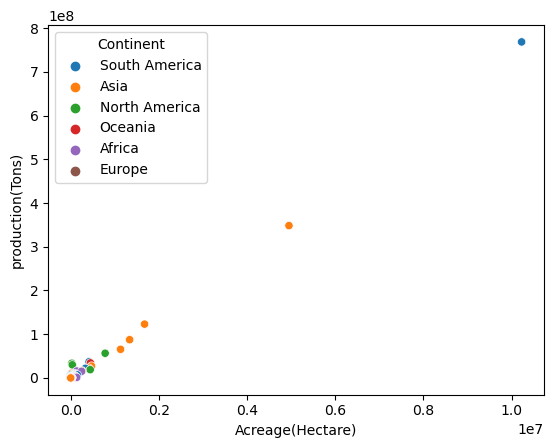

In [138]:
sns.scatterplot(data=df,x="Acreage(Hectare)",
               y="production(Tons)",hue="Continent")

In [139]:
df.head()

,Country,Continent,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Analysis for continent

In [140]:
df_continent=df.groupby("Continent").sum()

/var/folders/tj/ndpznl295jvctbfnyr9m792h0000gn/T/ipykernel_12965/1663322524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent=df.groupby("Continent").sum()


In [141]:
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]

In [143]:
df_continent

,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


## which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

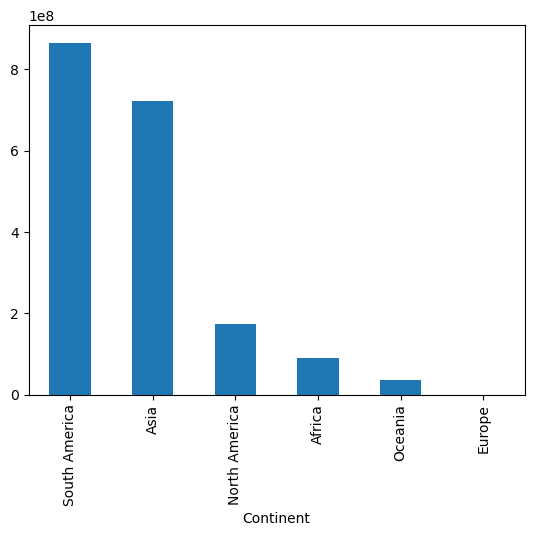

In [144]:
df_continent["production(Tons)"].sort_values(ascending=False).plot(kind="bar")

## do number of countries in a continent effects production of sugarcane?

<Axes: xlabel='number_of_countries', ylabel='production(Tons)'>

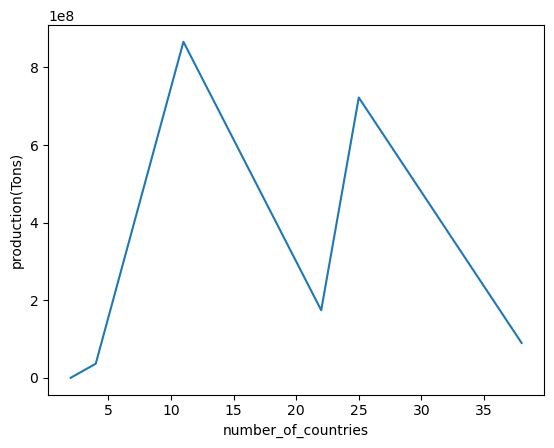

In [148]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="number_of_countries",y="production(Tons)")

## do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='production(Tons)'>

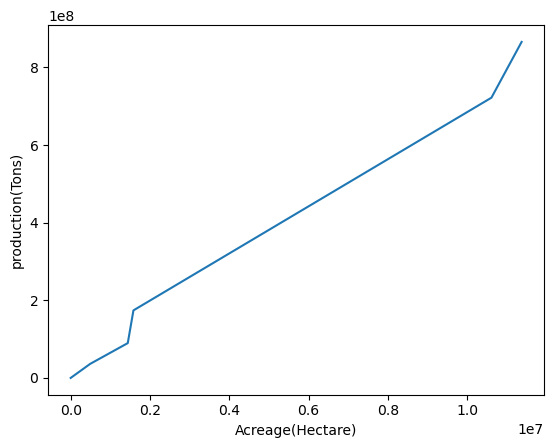

In [154]:
sns.lineplot(data=df_continent,x="Acreage(Hectare)",y="production(Tons)")

## production distribution by continent

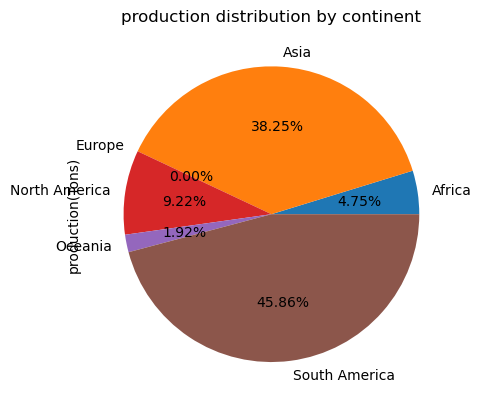

In [153]:
df_continent["production(Tons)"].plot(kind="pie",autopct="%.2f%%")
plt.title('production distribution by continent')
plt.show()

## correlation for continent

In [155]:
df_continent.corr()

,production(Tons),production_per_person(Kg),Acreage(Hectare),yeild(Kg/Hectare),number_of_countries
production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
yeild(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
